#### SFH In Briel Paper?

This code tries to determine the origins of the SFH used in the Briel paper using the BPASS data 


[It is established that the SFH used is the sum of the 13 BPASS SFH corresponding to the 13 metallicities within the BPASS data]

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate

In [2]:
path = "/Users/dillon/Desktop"
data = h5py.File(f"{path}/data.h5", "r")

SFH = data["SFH"]
sfh = SFH["TNG"]

Plotting the SFH for each metalicity in the BPASS data as well as the SFH used in the Briel paper

In [3]:
redshift = SFH['TNG'].attrs['redshift']
names = ['z001', 'z002','z003','z004','z006','z008', 'z010' , 'z014','z020','z030','z040', 'zem4', 'zem5' ]

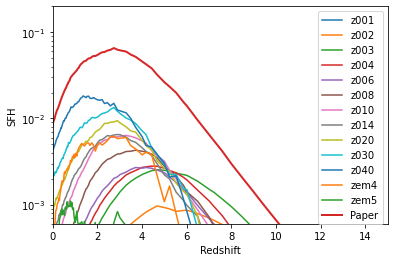

In [4]:
plt.figure()

for index in range(13):
    
    sfh_data = sfh[index, :]
    plt.plot(redshift, sfh_data, label=names[index])


plt.plot(SFH['TNG'].attrs['redshift'], np.sum(SFH["TNG"], axis=0), label="Paper", lw=2)
plt.xlabel("Redshift")
plt.ylabel("SFH")
plt.legend()

plt.yscale('log')
plt.xlim(0,15)
plt.ylim(6e-4,2e-1)


plt.show()

Defining a new variable which is the sum of each SFH from the BPASS data

In [5]:
tot = sfh[0, :] + sfh[1, :] + sfh[2, :] + sfh[3, :] + sfh[4, :] + sfh[5, :] + sfh[6, :]+ sfh[7, :] + sfh[8, :] + sfh[9, :] + sfh[10, :] + sfh[11, :] + sfh[12, :]

Plotting the sum of the 13 BPASS SFH and the SFH used in the Briel paper

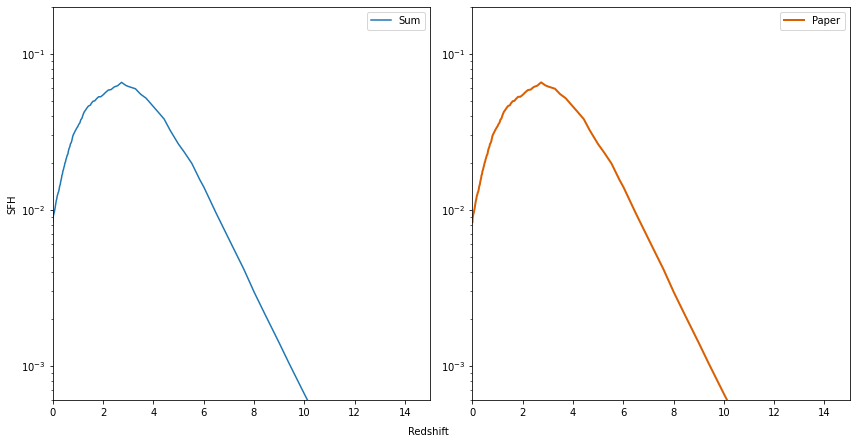

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


axs[0].plot(SFH['TNG'].attrs['redshift'], tot, label='Sum')
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_xlim(0, 15)
axs[0].set_ylim(6e-4, 2e-1)
axs[0].set_ylabel('SFH ')


axs[1].plot(SFH['TNG'].attrs['redshift'], np.sum(SFH["TNG"], axis=0), label="Paper", lw=2, color="#d95f02")
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_xlim(0, 15)
axs[1].set_ylim(6e-4, 2e-1)

plt.tight_layout()

fig.text(0.5, -0.02,r"Redshift", ha="center", va="bottom")


plt.show()